In [1]:
import import_ipynb
import GenerateBeizerCurve

importing Jupyter notebook from GenerateBeizerCurve.ipynb


In [2]:
COLOUR = '#2464b4' # Hex value of colour for graph output
FIGSIZE_X = 20
FIGSIZE_Y = 20
DPI = 80

In [3]:
from PIL import Image


def calculate_fig_size(file_name, multiplier):
    """
    A function that calculates figure's size and set FIGSIZE_X and FIGSIZE_Y
    :param file_name: the files' name to set ratio as. In this program it uses
                      first frame for getting ratio.
    :param multiplier: the multiplier for figsize from ratio
                       (if width:height ratio was 2:1 and multiplier was 10,
                       figsize will be 20, 10)
    """
    im = Image.open(file_name)
    width, height = im.size
    global FIGSIZE_X
    global FIGSIZE_Y
    width_ratio = float(width) / height
    FIGSIZE_X = multiplier * width_ratio
    FIGSIZE_Y = multiplier * 1


def set_fig_size():
    """
    A function that sets figsize using pylab
    """
    plt.rcParams['figure.figsize'] = (FIGSIZE_X, FIGSIZE_Y)

In [4]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


def generate_picture(file_name, flag_calculate_fig_size=True, multiplier=10):
    """
    A simple function that generates images using matplotlib and beizer curves
    :param file_name: the name of image file to generate
    :param flag_calculate_fig_size: whether or not to automatically calculate
                                    ratio and set figsize.
    :param multiplier: the multiplier for figsize from ratio
                       (if width:height ratio was 2:1 and multiplier was 10,
                       figsize will be 20, 10)
    """
    curves = GenerateBeizerCurve.get_curve(file_name)
    calculate_fig_size(file_name, multiplier)
    set_fig_size()

    Path = mpath.Path  # use mpath for drawing bezier curve
    fig, ax = plt.subplots()
    plt.title("Name : " + file_name)  # show title as frames
    for curve in curves:
        pp = mpatches.PathPatch(
            Path(curve,
                 [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
            fc="none", transform=ax.transData, color=COLOUR)
        ax.add_patch(pp)  # draw all curves and add_patch to ax.
        ax.plot([0], [0])
    plt.show()
    return fig

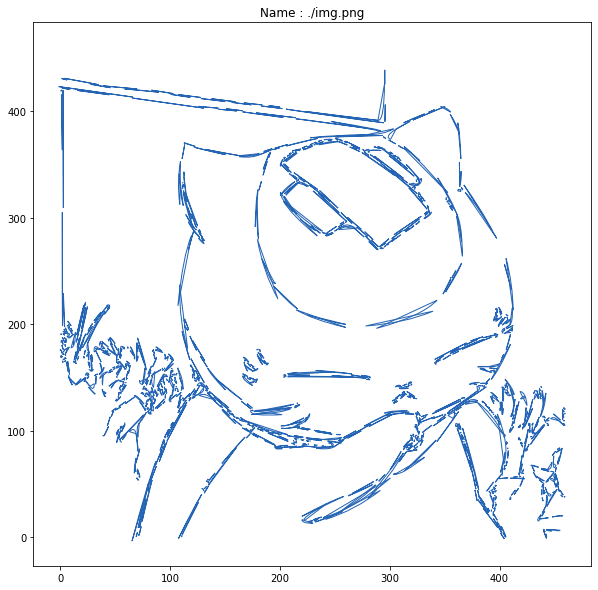

In [5]:
if __name__ == "__main__":
    generate_picture(file_name="./img.png", multiplier=10)